<a href="https://colab.research.google.com/github/jacob7123/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definition for a regression problem, but in our case, we are going to simplify it: predixting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [8]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating data to view ans fit

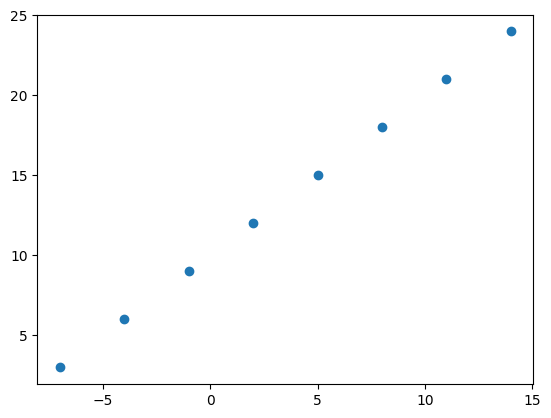

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [10]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [11]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [12]:
X[0], y[0]

(-7.0, 3.0)

In [13]:
X[1], y[1]

(-4.0, 6.0)

In [14]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [15]:
X[0].ndim

0

In [16]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

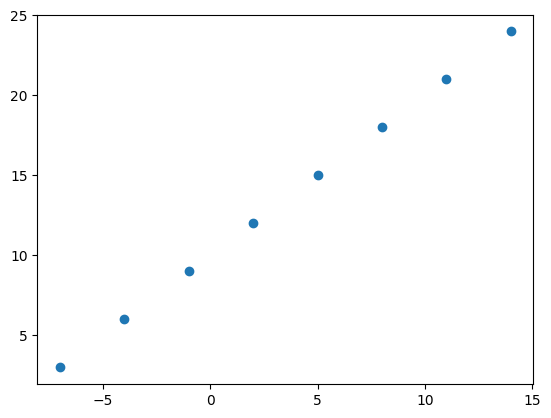

In [18]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input ans output layers, as well as the hidden layers of deep learning model.
2. **Compiling a model** - define the loss function(in others words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y(features and labels).

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
       optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochasitc gradient descent
       metrics = ["mae"] )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 385ms/step - loss: 17.2091 - mae: 17.2091
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 16.9279 - mae: 16.9279
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 16.6466 - mae: 16.6466
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 16.3654 - mae: 16.3654
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 16.0841 - mae: 16.0841


In [20]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 95ms/step


array([[-9.9390955]], dtype=float32)

In [22]:
y_pred + 11

array([[1.0609045]], dtype=float32)

## Impoving our model

we can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs**(leave it training for longer) or on more data(give the model more examples to learn from).

In [23]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
       optimizer = tf.keras.optimizers.SGD(),
       metrics = ["mae"])

# Fit the model(this time we will train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 366ms/step - loss: 17.9951 - mae: 17.9951
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 17.7138 - mae: 17.7138
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 17.4326 - mae: 17.4326
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 17.1513 - mae: 17.1513
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 16.8701 - mae: 16.8701
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 16.5888 - mae: 16.5888
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 16.3076 - mae: 16.3076
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 16.0263 - mae: 16.0263
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 15.7451 - mae: 15.7451
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 15.4638 - mae: 15.4638
Epoch 11/100
1/1 [==============================] 

In [24]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
# Let's see if our model's prediction has inproved...
model.predict([17])

1/1 [==============================] - 0s 101ms/step


array([[29.728436]], dtype=float32)

###Exercise

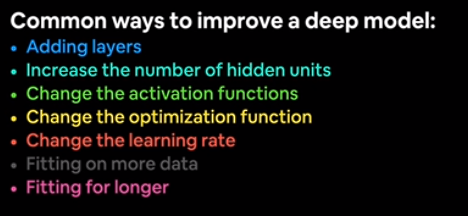

In [26]:
# Let's make model

# 1. Create the model(this time with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
      #  optimizer = tf.keras.optimizers.SGD(),
       optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
       metrics = ["mae"])

# Fit the model(this time we will train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 845ms/step - loss: 14.0624 - mae: 14.0624
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 13.3357 - mae: 13.3357
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 12.6079 - mae: 12.6079
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 11.8776 - mae: 11.8776
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 11.1426 - mae: 11.1426
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4009 - mae: 10.4009
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6498 - mae: 9.6498
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.8860 - mae: 8.8860
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.1066 - mae: 8.1066
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 7.3090 - mae: 7.3090
Epoch 11/100
1/1 [==============================] - 0s 1

In [27]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [28]:
# Let's try to make a prediction
model.predict([17])

1/1 [==============================] - 0s 110ms/step


array([[27.696083]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you will go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it ->  evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It is a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predixtions of the model - how do
the predictions of a model line up against the ground truth(the original labels)?

In [29]:
# Make a biffer dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [30]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

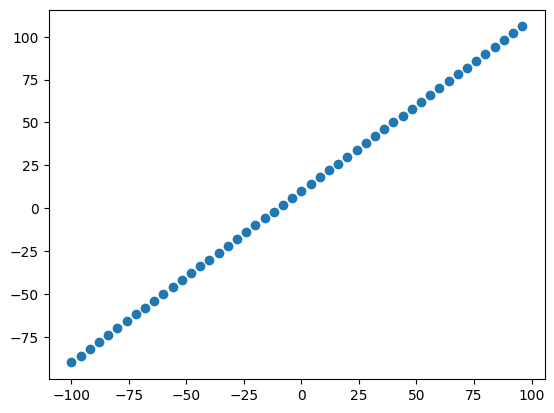

In [31]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% the total data you have available.
* **Validation set** - the model gets tuned on this data, which typically 10-15% of the data availible.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% the total data available.

In [32]:
# Check the length of how many samples we have
len(X)

50

In [33]:
# Split the data onto train and test sets
X_train = X[:40] # first 40 are training samples(80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are  testing samples(20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we have got our data in training and the sets... Let's visualize it again

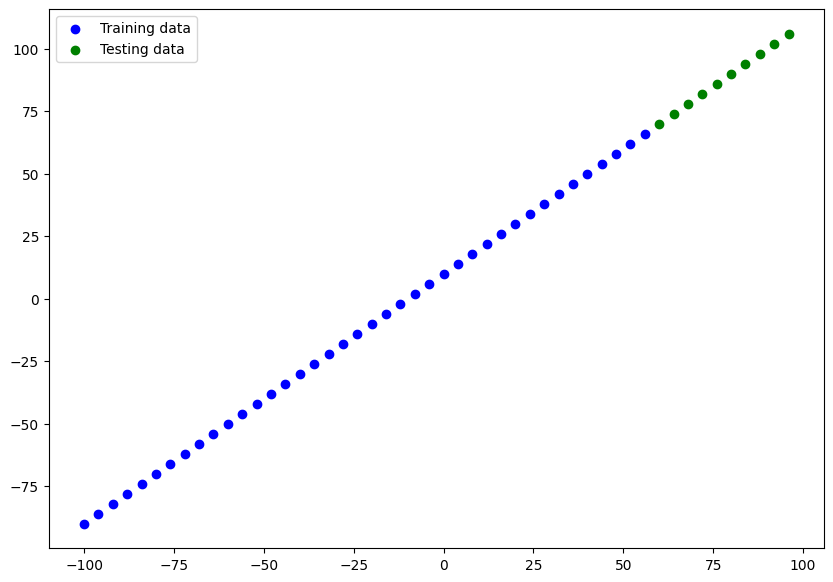

In [34]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = 'b', label = "Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c = 'g', label = "Testing data") # want our model to be able to predict this(given X, what is y?)
# Show a legend
plt.legend()

In [35]:
# Let's have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
       optimizer = tf.keras.optimizers.SGD(),
       metrics = ["mae"])

# Fit the model(this time we will train for longer)
# model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

###Visualizing the model

In [36]:
# model.summary()

In [37]:
# Let's creaste a model which building  automatically the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create the model(same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer1"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")

# 2. Compile the model(same as above)
model.compile(loss = tf.keras.losses.mae,
       optimizer = tf.keras.optimizers.SGD(),
       metrics = ["mae"])

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - there are the parameters(patterns)the model can update as it trains.
* Non-trainable params - these parameters are not updated during training(this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters(total and trainable) bt calling `model.summary()`.

In [39]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 200, verbose = 0)

In [40]:
# Get the summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


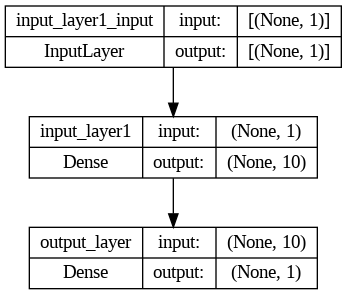

In [41]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

###Visualizing our model's predictions

To visualize predition, it is a good idea to plot them against the ground truth labels.

Often toy will see this in the form of `y_test` or `y_true` versus `y_pred`(ground truth versus your model's prediction).


In [42]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[58.462757],
       [62.16103 ],
       [65.8593  ],
       [69.55756 ],
       [73.25583 ],
       [76.95411 ],
       [80.65238 ],
       [84.35065 ],
       [88.04892 ],
       [91.74719 ]], dtype=float32)

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you are going to reuse some kind of functionality in the future, it is a good idea to turn it into a function

In [44]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
           train_labels = y_train,
           test_data = X_test,
           test_labels = y_test,
           predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize = (10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label = "Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = 'r', label = "Prediction data")
  # Show a legend
  plt.legend()

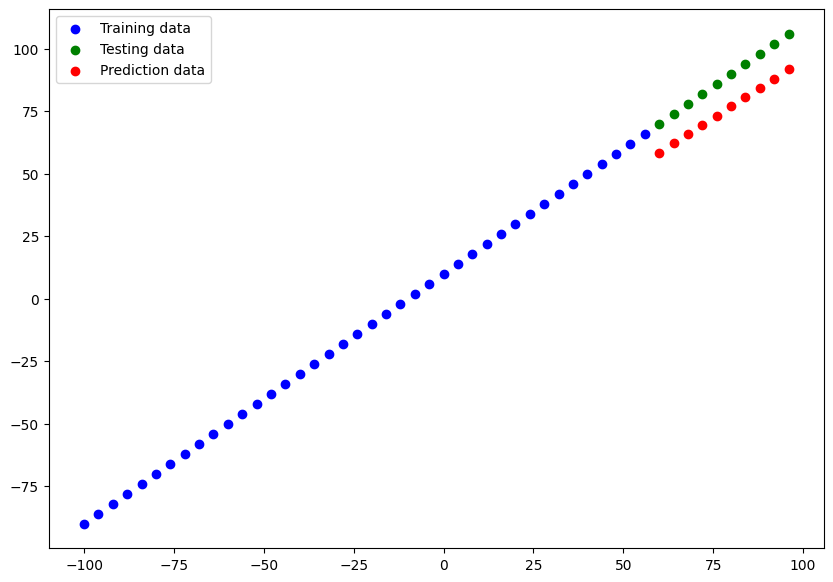

In [45]:
plot_predictions()

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrixs to evalute your model's performance.

Since we are working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [46]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 142ms/step - loss: 12.8950 - mae: 12.8950


[12.895025253295898, 12.895025253295898]

In [47]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29.537243 , 25.83897  , 22.140701 , 18.442436 , 15.395337 ,
       13.0275345, 11.339047 , 10.32987  , 10.       , 10.349439 ],
      dtype=float32)>

In [48]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[58.462757],
       [62.16103 ],
       [65.8593  ],
       [69.55756 ],
       [73.25583 ],
       [76.95411 ],
       [80.65238 ],
       [84.35065 ],
       [88.04892 ],
       [91.74719 ]], dtype=float32)>

In [49]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [50]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([58.462757, 62.16103 , 65.8593  , 69.55756 , 73.25583 , 76.95411 ,
       80.65238 , 84.35065 , 88.04892 , 91.74719 ], dtype=float32)>

In [51]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                   y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=12.895027>

In [52]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                   y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=167.0328>

In [53]:
# Make some functions to MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                      y_pred = tf.squeeze(tf.squeeze(y_pred)))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                     y_pred = tf.squeeze(tf.squeeze(y_pred)))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evalute it ...
```

1. Fet more data - get mopre examples for your model to train on(more opportunities to learn patterns or relationships between features and labels).
2. Make your model latger(using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer and trained for 100 epochs.
2. `model_2` - 2 layers and trained for 100 epochs.
3. `mosel_3` - 2 layers and trianed for 500 epochs.

**Build** `model_1`

In [54]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ["mae"])

# 3. fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 60.9662 - mae: 60.9662
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 26.1657 - mae: 26.1657
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5767 - mae: 10.5767
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.0991 - mae: 13.0991
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 12.1594 - mae: 12.1594
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4094 - mae: 9.4094
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 8.5550 - mae: 8.5550
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0574 - mae: 9.0574
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.6849 - mae: 18.6849
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0879 - mae: 10.0879
Epoch 11/100
2/2 [==============================] - 0s 7ms/s

1/1 [==============================] - 0s 51ms/step


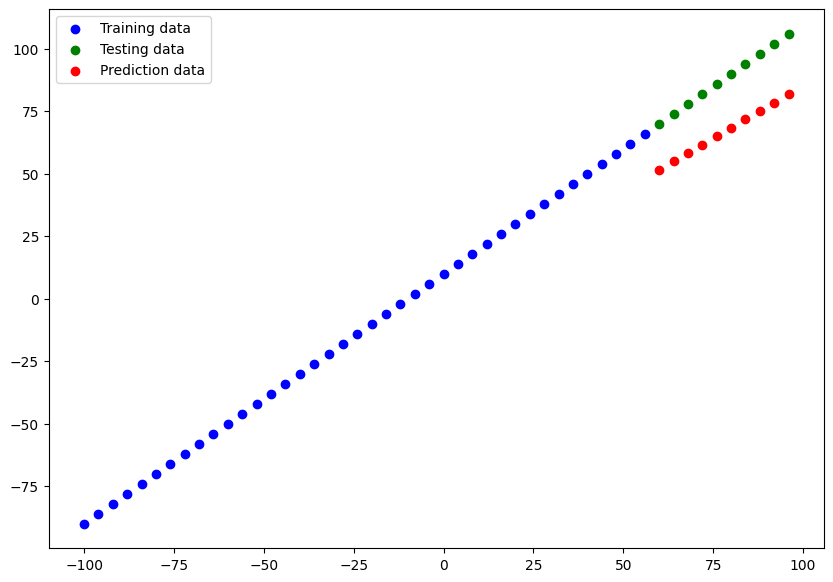

In [55]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)

In [56]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.295843>,
 <tf.Tensor: shape=(), dtype=float32, numpy=456.95273>)

**Build** `model_2`
* 2 layers and trained for 100 epochs

In [57]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 49.7024 - mse: 3886.1421
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 11.4430 - mse: 186.7703
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.5766 - mse: 1289.1274
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.7172 - mse: 286.7017
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 17.4520 - mse: 409.3674
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2092 - mse: 121.6365
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2182 - mse: 153.1387
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1499 - mse: 162.0785
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 41.0045 - mse: 2660.7888
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 28.3315 - mse: 1132.1809
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 59ms/step


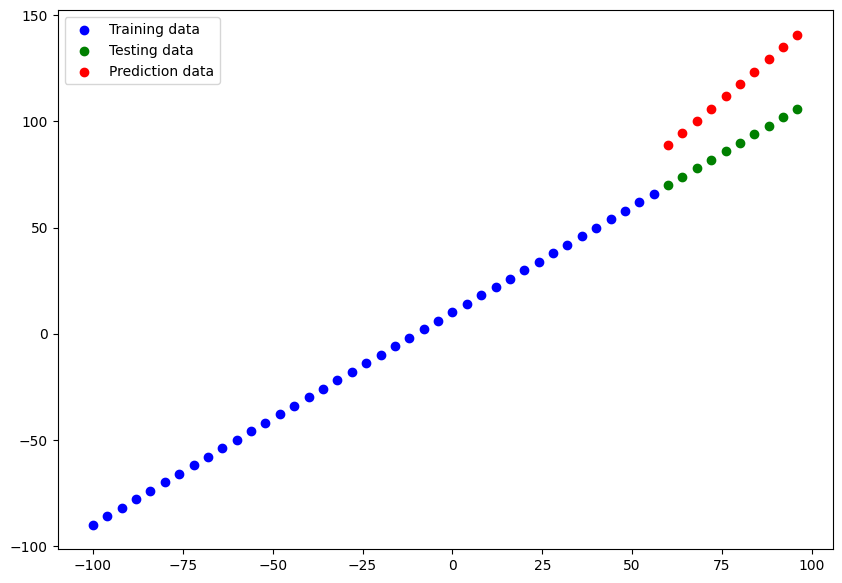

In [58]:
# Make and plot prediction of model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [59]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.75678>,
 <tf.Tensor: shape=(), dtype=float32, numpy=742.31366>)

**Build `model_3`**
* 2 layers and trained for 500 epochs

In [60]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 35.3164 - mae: 35.3164
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 28.9435 - mae: 28.9435
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 32.9018 - mae: 32.9018
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 13.6132 - mae: 13.6132
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 18.5438 - mae: 18.5438
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 9.3395 - mae: 9.3395
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 10.3630 - mae: 10.3630
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2777 - mae: 11.2777
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 42.5982 - mae: 42.5982
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 29.7202 - mae: 29.7202
Epoch 11/500
2/2 [==============================] - 0s 15

1/1 [==============================] - 0s 122ms/step


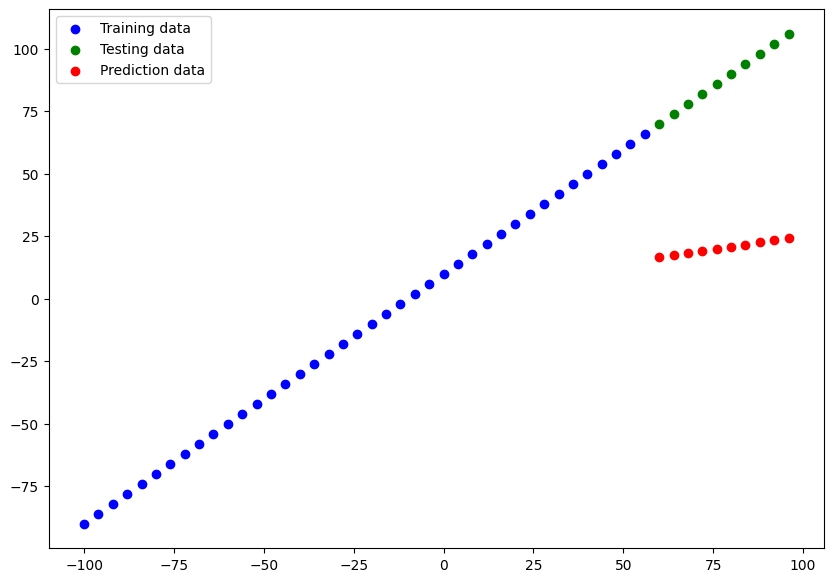

In [61]:
# Make and plot some predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [62]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.50874>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4641.2256>)

🔑 **Note:** You want to start with small experiments(small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We have run a few experiments. Let's compare the results.

In [63]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
          ["model_2", mae_2.numpy(), mse_2.numpy()],
          ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "MAE", "MSE"])
all_results

,model,MAE,MSE
0,model_1,21.295843,456.952728
1,model_2,26.756781,742.313660
2,model_3,67.508743,4641.225586


Looks like `model_2` performed the best

In [64]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which do not work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking you experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when it doing so, it can be tedious if you are running lots of experiment.

Luckily, there are tools to help us!

**Resource:** As you build more models, you will want to look in using:

* Tensorboard - a component of the TensorFlow library to help track modelling experiments(we will see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments(plugs straight into TensorBoard).


## Saving our models

Saving our models allows us to use them outside of Google Colab(or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SaveModel format
2. The HDF5 format

In [65]:
# Save model using SaveModel format
model_2.save("best_model_SaveModel_format")

In [66]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [67]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SaveModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 97ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [69]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# Compare model_2 predictions with .h5 model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 86ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model(or any other file) from Google Colab

If you want to download your files from Google Colab:
1. You can go to the "files" tab and right click on the file you are after and click "download".
2. Use code(see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there.

In [71]:
# Download a file from google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# Save a file from Google Colab to Google Drive(requares mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow/models

In [73]:
!ls /content/drive/MyDrive/TensorFlow/models

best_model_HDF5_format.h5


## A larger example

In [74]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [76]:
# Let's try one-hot encode our DataFrame so it is all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [77]:
# Create X & y values(features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [78]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [79]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [80]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [81]:
# Build a neural network(sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.SGD(),
            metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13247.2822 - mae: 13247.2822
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.0947 - mae: 12325.0947
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12175.0391 - mae: 12175.0391
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12101.2012 - mae: 12101.2012
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11988.4512 - mae: 11988.4512
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11805.0586 - mae: 11805.0586
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11485.6162 - mae: 11485.6162
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 10979.5332 - mae: 10979.5332
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10363.1143 - mae: 10363.1143
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9718.186

In [82]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8926.4639 - mae: 8926.4639


[8926.4638671875, 8926.4638671875]

In [83]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model is not performing too well... Let's try and improve it !

To(try) improve our model, we will run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer.
2. San as above but train for longer(200 epochs)
3. (insert your own experiment here)

In [84]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_2.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ["mae"])

# 3. Fit a model
insurance_model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13338.8711 - mae: 13338.8711
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13319.1816 - mae: 13319.1816
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13280.6104 - mae: 13280.6104
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13207.8066 - mae: 13207.8066
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13084.5234 - mae: 13084.5234
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 12898.9531 - mae: 12898.9531
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12659.3926 - mae: 12659.3926
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12400.5752 - mae: 12400.5752
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12193.5039 - mae: 12193.5039
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12109.05

In [85]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8628.3281 - mae: 8628.3281


[8628.328125, 8628.328125]

In [86]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8926.4639 - mae: 8926.4639


[8926.4638671875, 8926.4638671875]

In [87]:
# Set ransom set
tf.random.set_seed(42)

# 1. Creaste the model(Sam as above)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ["mae"])

# 3. Fit the model
history = insurance_model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13342.9893 - mae: 13342.9893
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13330.8496 - mae: 13330.8496
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13304.6660 - mae: 13304.6660
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13249.8145 - mae: 13249.8145
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13149.6553 - mae: 13149.6553
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 12988.5693 - mae: 12988.5693
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12764.8936 - mae: 12764.8936
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12503.8125 - mae: 12503.8125
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12261.1885 - mae: 12261.1885
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 12129.93

In [88]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8631.9160 - mae: 8631.9160


[8631.916015625, 8631.916015625]

In [89]:
insurance_model_2.evaluate(X_test, y_test), insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8926.4639 - mae: 8926.4639


([8628.328125, 8628.328125], [8926.4638671875, 8926.4638671875])

Text(0.5, 0, 'epochs')

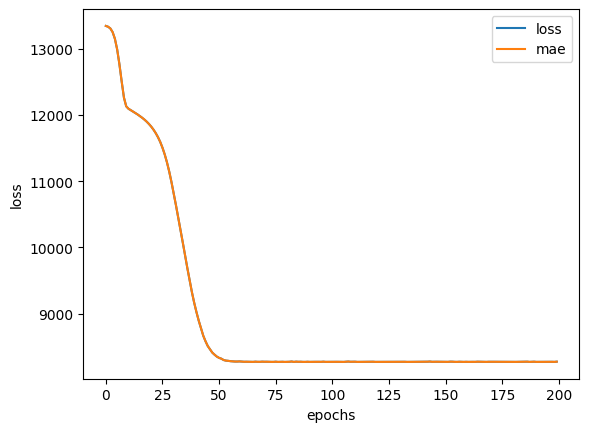

In [90]:
# Plot history(also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you are working on. However, many people asked this question before... so TensorFlow has a solution! It is called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a  certain metrics.

## Preprocessing data(normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you are not sure on which to use, you could try both and see which performs better.


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few from Scikit-Learn.


In [92]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
  (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 amd 1
  (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization(MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [93]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [94]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [95]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encode. Now let's build a neural network model on it and see how it goes.

In [100]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ["mae"])

# 3. Fit the model
insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13345.3066 - mae: 13345.3066
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13342.7158 - mae: 13342.7158
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13336.8184 - mae: 13336.8184
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13324.8418 - mae: 13324.8418
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13303.5635 - mae: 13303.5635
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13269.7617 - mae: 13269.7617
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13220.5742 - mae: 13220.5742
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13153.2578 - mae: 13153.2578
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13065.1113 - mae: 13065.1113
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12953.55

In [101]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8622.0254 - mae: 8622.0254


[8622.025390625, 8622.025390625]

In [97]:
# Insurance model 2 result
# 9/9 [==============================] - 0s 8ms/step - loss: 8628.3281 - mae: 8628.3281
# [8628.328125, 8628.328125]